In [9]:
import pymc as pm
print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'D:\\a\\1\\s\\numpy\\build\\openblas_info'

In [10]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Generar un dataset ficticio
np.random.seed(42)
n_samples = 100
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, size=n_samples),
    'BMI': np.random.uniform(18.5, 40.0, size=n_samples),
    'Glucose': np.random.uniform(70, 200, size=n_samples),
    'FamilyHistory': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]),
})
# Crear variable objetivo ficticia (Diabetes)
data['Diabetes'] = (
    (0.01 * data['Age']) + 
    (0.05 * data['BMI']) + 
    (0.02 * data['Glucose']) + 
    (0.3 * data['FamilyHistory']) + 
    np.random.normal(0, 0.2, size=n_samples)
) > 0.5
data['Diabetes'] = data['Diabetes'].astype(int)

print("Ejemplo del dataset:")
print(data.head())

# Paso 3: Inferencia Bayesiana con PyMC
with pm.Model() as model:
    # Priors: Asumimos distribuciones normales para los coeficientes
    beta_age = pm.Normal('beta_age', mu=0, sigma=1)
    beta_bmi = pm.Normal('beta_bmi', mu=0, sigma=1)
    beta_glucose = pm.Normal('beta_glucose', mu=0, sigma=1)
    beta_family = pm.Normal('beta_family', mu=0, sigma=1)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
    # Modelo lineal
    logit_p = (
        intercept + 
        beta_age * data['Age'] + 
        beta_bmi * data['BMI'] + 
        beta_glucose * data['Glucose'] + 
        beta_family * data['FamilyHistory']
    )
    
    # Likelihood (verosimilitud)
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    diabetes = pm.Bernoulli('Diabetes', p=p, observed=data['Diabetes'])
    
    # Muestreo MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Paso 4: Visualizar resultados

# Resumen de parámetros
print(az.summary(trace, hdi_prob=0.95))

# Trazas de los parámetros
az.plot_trace(trace)
plt.show()

# Visualizar distribuciones posteriores
az.plot_posterior(trace, hdi_prob=0.95)
plt.show()


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'D:\\a\\1\\s\\numpy\\build\\openblas_info'

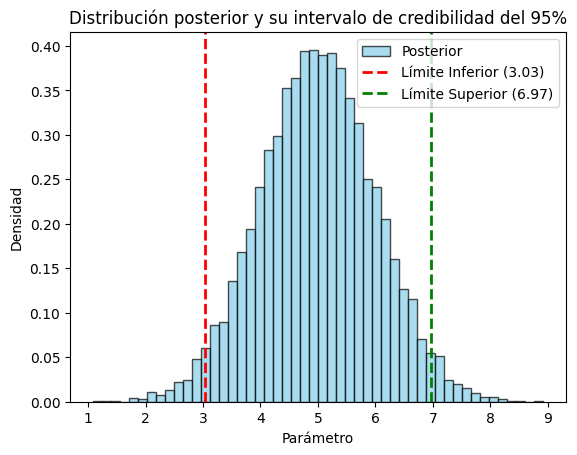

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Simular muestras de una posterior ficticia
np.random.seed(42)
posterior_samples = np.random.normal(loc=5, scale=1, size=10000)  # media=5, desviación estándar=1

# Calcular el intervalo de credibilidad del 95%
lower_bound = np.percentile(posterior_samples, 2.5)  # Límite inferior
upper_bound = np.percentile(posterior_samples, 97.5)  # Límite superior

# Visualizar la distribución posterior
plt.hist(posterior_samples, bins=50, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Posterior")
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Límite Inferior ({lower_bound:.2f})')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'Límite Superior ({upper_bound:.2f})')
plt.title("Distribución posterior y su intervalo de credibilidad del 95%")
plt.xlabel("Parámetro")
plt.ylabel("Densidad")
plt.legend()
plt.show()


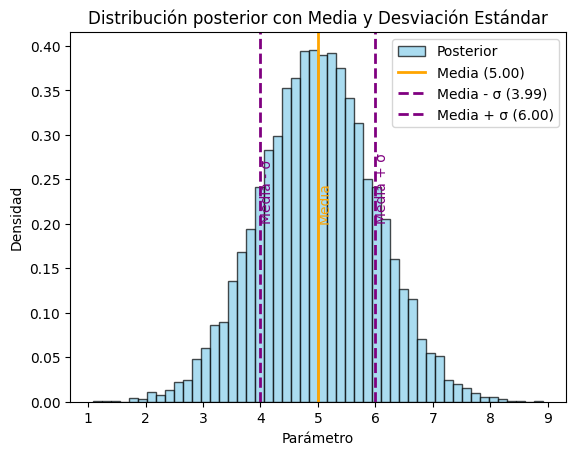

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simular muestras de una posterior ficticia
np.random.seed(42)
posterior_samples = np.random.normal(loc=5, scale=1, size=10000)  # media=5, desviación estándar=1

# Calcular estadísticas
media = np.mean(posterior_samples)
varianza = np.var(posterior_samples)  # Varianza
std_dev = np.sqrt(varianza)  # Desviación estándar

# Calcular los límites (media ± desviación estándar)
lower_bound = media - std_dev
upper_bound = media + std_dev

# Visualizar la distribución posterior
plt.hist(posterior_samples, bins=50, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Posterior")
plt.axvline(media, color='orange', linestyle='-', linewidth=2, label=f'Media ({media:.2f})')
plt.axvline(lower_bound, color='purple', linestyle='--', linewidth=2, label=f'Media - σ ({lower_bound:.2f})')
plt.axvline(upper_bound, color='purple', linestyle='--', linewidth=2, label=f'Media + σ ({upper_bound:.2f})')

# Añadir anotaciones
plt.text(media, 0.2, 'Media', rotation=90, color='orange', verticalalignment='bottom')
plt.text(lower_bound, 0.2, 'Media - σ', rotation=90, color='purple', verticalalignment='bottom')
plt.text(upper_bound, 0.2, 'Media + σ', rotation=90, color='purple', verticalalignment='bottom')

plt.title("Distribución posterior con Media y Desviación Estándar")
plt.xlabel("Parámetro")
plt.ylabel("Densidad")
plt.legend()
plt.show()


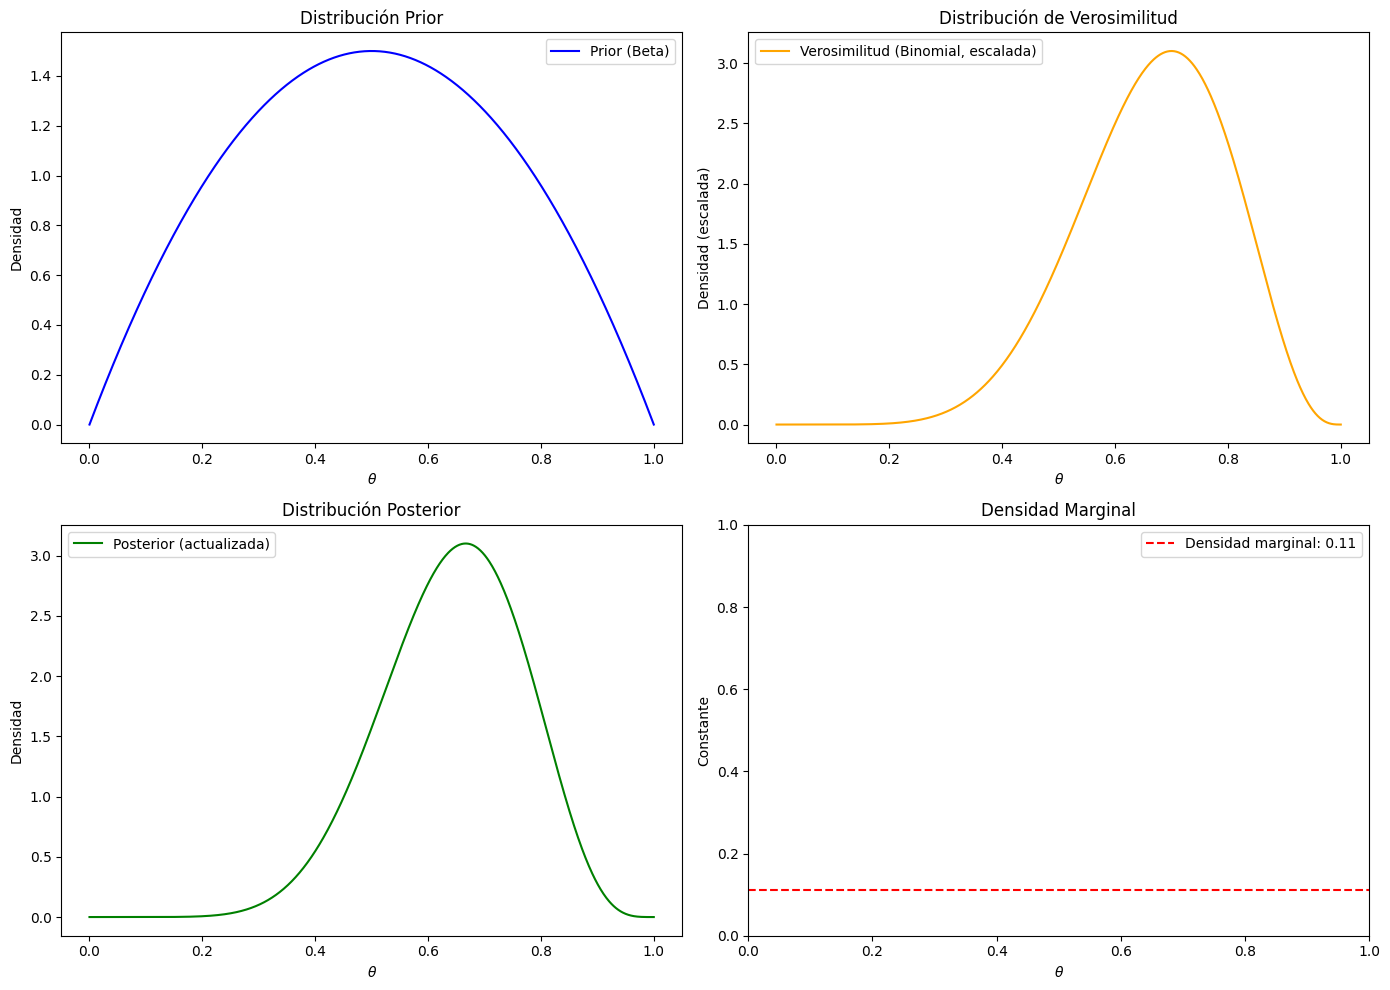

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# Configurar el espacio del parámetro theta
theta = np.linspace(0, 1, 1000)

# 1. Prior: Distribución beta como ejemplo (Beta(2, 2))
a_prior, b_prior = 2, 2
prior = beta.pdf(theta, a_prior, b_prior)

# 2. Verosimilitud: Ejemplo binomial con datos ficticios
n_trials = 10  # Número de ensayos
successes = 7  # Éxitos observados
likelihood = binom.pmf(successes, n_trials, theta)

# 3. Posterior: Actualizar prior con los datos
a_post = a_prior + successes
b_post = b_prior + n_trials - successes
posterior = beta.pdf(theta, a_post, b_post)

# 4. Densidad marginal: Constante de normalización (sumarización de la verosimilitud * prior)
marginal = np.trapz(prior * likelihood, theta)  # Aproximación numérica

# Normalizar la verosimilitud para fines de visualización
likelihood_scaled = likelihood / np.max(likelihood) * np.max(posterior)

# Graficar las distribuciones
plt.figure(figsize=(14, 10))

# Prior
plt.subplot(2, 2, 1)
plt.plot(theta, prior, color='blue', label='Prior (Beta)')
plt.title('Distribución Prior')
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.legend()

# Verosimilitud
plt.subplot(2, 2, 2)
plt.plot(theta, likelihood_scaled, color='orange', label='Verosimilitud (Binomial, escalada)')
plt.title('Distribución de Verosimilitud')
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad (escalada)')
plt.legend()

# Posterior
plt.subplot(2, 2, 3)
plt.plot(theta, posterior, color='green', label='Posterior (actualizada)')
plt.title('Distribución Posterior')
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.legend()

# Densidad marginal
plt.subplot(2, 2, 4)
plt.axhline(marginal, color='red', linestyle='--', label=f'Densidad marginal: {marginal:.2f}')
plt.title('Densidad Marginal')
plt.xlabel(r'$\theta$')
plt.ylabel('Constante')
plt.legend()

plt.tight_layout()
plt.show()


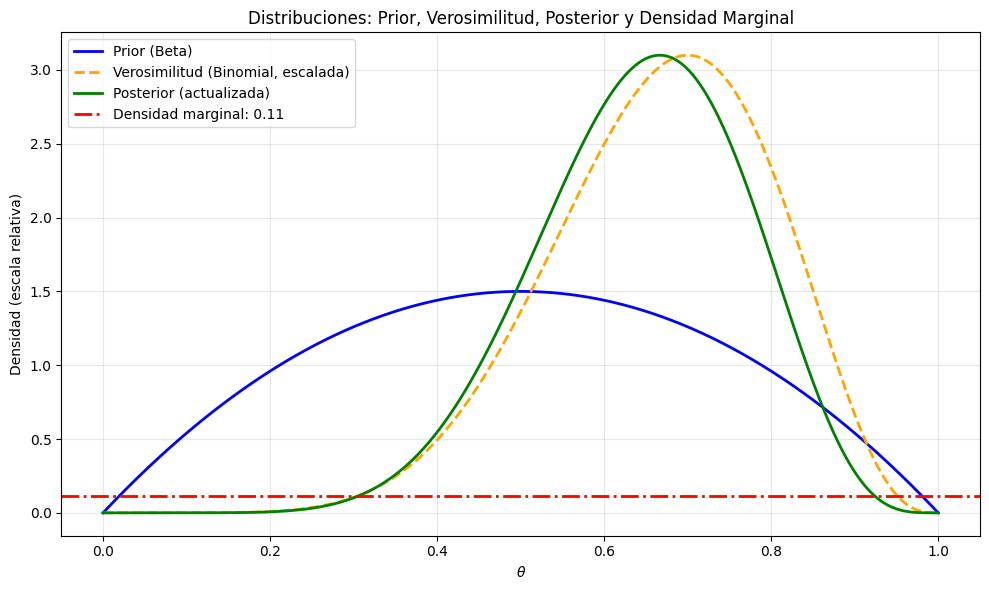

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# Configurar el espacio del parámetro theta
theta = np.linspace(0, 1, 1000)

# 1. Prior: Distribución beta como ejemplo (Beta(2, 2))
a_prior, b_prior = 2, 2
prior = beta.pdf(theta, a_prior, b_prior)

# 2. Verosimilitud: Ejemplo binomial con datos ficticios
n_trials = 10  # Número de ensayos
successes = 7  # Éxitos observados
likelihood = binom.pmf(successes, n_trials, theta)

# 3. Posterior: Actualizar prior con los datos
a_post = a_prior + successes
b_post = b_prior + n_trials - successes
posterior = beta.pdf(theta, a_post, b_post)

# 4. Densidad marginal: Constante de normalización (sumarización de la verosimilitud * prior)
marginal = np.trapz(prior * likelihood, theta)  # Aproximación numérica

# Normalizar la verosimilitud para fines de visualización
likelihood_scaled = likelihood / np.max(likelihood) * np.max(posterior)

# Graficar todas las distribuciones juntas
plt.figure(figsize=(10, 6))

# Prior
plt.plot(theta, prior, label='Prior (Beta)', color='blue', linewidth=2)

# Verosimilitud (escalada)
plt.plot(theta, likelihood_scaled, label='Verosimilitud (Binomial, escalada)', color='orange', linestyle='--', linewidth=2)

# Posterior
plt.plot(theta, posterior, label='Posterior (actualizada)', color='green', linewidth=2)

# Densidad marginal
plt.axhline(marginal, color='red', linestyle='-.', linewidth=2, label=f'Densidad marginal: {marginal:.2f}')

# Configuración del gráfico
plt.title("Distribuciones: Prior, Verosimilitud, Posterior y Densidad Marginal")
plt.xlabel(r'$\theta$')
plt.ylabel("Densidad (escala relativa)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, norm, uniform, poisson
import ipywidgets as widgets
from ipywidgets import interact

# Función para generar el gráfico interactivo
def plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2, n_trials=10, successes=7):
    # Parámetros para la prior
    if prior_dist == 'Beta':
        a_prior, b_prior = prior_param1, prior_param2
        prior = beta.pdf(theta, a_prior, b_prior)
    elif prior_dist == 'Normal':
        mu_prior, sigma_prior = prior_param1, prior_param2
        prior = norm.pdf(theta, mu_prior, sigma_prior)
    elif prior_dist == 'Uniform':
        low_prior, high_prior = prior_param1, prior_param2
        prior = uniform.pdf(theta, low_prior, high_prior)
    elif prior_dist == 'Poisson':
        lambda_prior = prior_param1
        prior = poisson.pmf(np.round(theta * n_trials), lambda_prior)  # Aproximando Poisson como discreta
    
    # Parámetros para la verosimilitud
    if likelihood_dist == 'Binomial':
        likelihood = binom.pmf(successes, n_trials, theta)
    elif likelihood_dist == 'Poisson':
        lambda_likelihood = likelihood_param1
        likelihood = poisson.pmf(np.round(theta * n_trials), lambda_likelihood)
    elif likelihood_dist == 'Normal':
        mu_likelihood, sigma_likelihood = likelihood_param1, likelihood_param2
        likelihood = norm.pdf(theta, mu_likelihood, sigma_likelihood)
    elif likelihood_dist == 'Uniform':
        low_likelihood, high_likelihood = likelihood_param1, likelihood_param2
        likelihood = uniform.pdf(theta, low_likelihood, high_likelihood)
    
    # Normalizar la verosimilitud para fines de visualización
    likelihood_scaled = likelihood / np.max(likelihood) * np.max(prior)

    # Posterior (actualización sencilla)
    posterior = prior * likelihood_scaled
    posterior /= np.sum(posterior)  # Normalizar posterior

    # Crear gráfico
    plt.figure(figsize=(10, 6))
    
    # Graficar prior, verosimilitud y posterior
    plt.plot(theta, prior, label=f'Prior ({prior_dist})', color='blue', linewidth=2)
    plt.plot(theta, likelihood_scaled, label=f'Verosimilitud ({likelihood_dist})', color='orange', linestyle='--', linewidth=2)
    plt.plot(theta, posterior, label='Posterior', color='green', linewidth=2)
    
    # Configuración del gráfico
    plt.title("Distribuciones: Prior, Verosimilitud y Posterior")
    plt.xlabel(r'$\theta$')
    plt.ylabel("Densidad (escala relativa)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Espacio para los valores de theta
theta = np.linspace(0, 1, 1000)

# Crear los widgets de entrada interactivos
prior_dist_widget = widgets.Dropdown(
    options=['Beta', 'Normal', 'Uniform', 'Poisson'],
    value='Beta',
    description='Prior:',
)

prior_param1_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='a:', disabled=False)
prior_param2_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='b:', disabled=False)

likelihood_dist_widget = widgets.Dropdown(
    options=['Binomial', 'Poisson', 'Normal', 'Uniform'],
    value='Binomial',
    description='Verosimilitud:',
)

likelihood_param1_widget = widgets.FloatSlider(value=7, min=0, max=20, step=1, description='Éxitos:', disabled=False)
likelihood_param2_widget = widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Ensayos:', disabled=False)

# Función para actualizar los parámetros de acuerdo a la distribución seleccionada
def update_widgets(change):
    if prior_dist_widget.value == 'Beta':
        prior_param1_widget.description = 'a:'
        prior_param2_widget.description = 'b:'
    elif prior_dist_widget.value == 'Normal':
        prior_param1_widget.description = 'mu:'
        prior_param2_widget.description = 'sigma:'
    elif prior_dist_widget.value == 'Uniform':
        prior_param1_widget.description = 'low:'
        prior_param2_widget.description = 'high:'
    elif prior_dist_widget.value == 'Poisson':
        prior_param1_widget.description = 'lambda:'
        prior_param2_widget.layout.visibility = 'hidden'  # Hacer invisible el segundo parámetro

    if likelihood_dist_widget.value == 'Binomial':
        likelihood_param1_widget.description = 'Éxitos:'
        likelihood_param2_widget.description = 'Ensayos:'
    elif likelihood_dist_widget.value == 'Poisson':
        likelihood_param1_widget.description = 'lambda:'
        likelihood_param2_widget.layout.visibility = 'hidden'  # Hacer invisible el segundo parámetro
    elif likelihood_dist_widget.value == 'Normal':
        likelihood_param1_widget.description = 'mu:'
        likelihood_param2_widget.description = 'sigma:'
    elif likelihood_dist_widget.value == 'Uniform':
        likelihood_param1_widget.description = 'low:'
        likelihood_param2_widget.description = 'high:'

# Conectar la actualización de los widgets
prior_dist_widget.observe(update_widgets, names='value')
likelihood_dist_widget.observe(update_widgets, names='value')

# Generar el gráfico interactivo
interact(plot_distributions, 
         prior_dist=prior_dist_widget, 
         prior_param1=prior_param1_widget, 
         prior_param2=prior_param2_widget, 
         likelihood_dist=likelihood_dist_widget, 
         likelihood_param1=likelihood_param1_widget, 
         likelihood_param2=likelihood_param2_widget)


interactive(children=(Dropdown(description='Prior:', options=('Beta', 'Normal', 'Uniform', 'Poisson'), value='…

<function __main__.plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2, n_trials=10, successes=7)>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (beta, binom, norm, uniform, poisson, gamma, 
                         expon, lognorm, chi2, t)
import ipywidgets as widgets
from ipywidgets import interact

# Función para graficar las distribuciones
def plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2):
    # Definir el espacio para theta (valores de 0 a 1)
    theta = np.linspace(0, 1, 1000)
    
    # Distribuciones disponibles
    dist_dict = {
        'Beta': lambda p1, p2: beta.pdf(theta, p1, p2),
        'Normal': lambda p1, p2: norm.pdf(theta, p1, p2),
        'Uniform': lambda p1, p2: uniform.pdf(theta, p1, p2),
        'Poisson': lambda p1, p2: poisson.pmf(np.round(theta * 10), p1),
        'Gamma': lambda p1, p2: gamma.pdf(theta, p1, scale=p2),
        'Exponential': lambda p1, p2: expon.pdf(theta, scale=p2),
        'LogNormal': lambda p1, p2: lognorm.pdf(theta, p1, scale=p2),
        'Chi-squared': lambda p1, p2: chi2.pdf(theta, p1),
        'T-distribution': lambda p1, p2: t.pdf(theta, p1),
        'Binomial': lambda p1, p2: binom.pmf(7, 10, theta),
    }
    
    # Prior
    prior = dist_dict[prior_dist](prior_param1, prior_param2)
    
    # Verosimilitud
    if likelihood_dist == 'Binomial':
        likelihood = binom.pmf(7, 10, theta)
    elif likelihood_dist == 'Poisson':
        likelihood = poisson.pmf(np.round(theta * 10), likelihood_param1)
    else:
        likelihood = dist_dict[likelihood_dist](likelihood_param1, likelihood_param2)
    
    # Posterior (simple multiplicación de prior y likelihood)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalización
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(theta, prior, label=f'Prior: {prior_dist}', color='blue', linewidth=2)
    plt.plot(theta, likelihood, label=f'Likelihood: {likelihood_dist}', color='orange', linestyle='--', linewidth=2)
    plt.plot(theta, posterior, label='Posterior', color='green', linewidth=2)
    plt.title("Distribuciones: Prior, Likelihood y Posterior")
    plt.xlabel(r'$\theta$')
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Widgets interactivos
prior_dist_widget = widgets.Dropdown(
    options=['Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution', 'Binomial'],
    value='Beta', description='Prior:'
)

prior_param1_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Param 1:')
prior_param2_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Param 2:')

likelihood_dist_widget = widgets.Dropdown(
    options=['Binomial', 'Poisson', 'Normal', 'Uniform', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution'],
    value='Binomial', description='Likelihood:'
)

likelihood_param1_widget = widgets.FloatSlider(value=7, min=0, max=20, step=1, description='Param 1:')
likelihood_param2_widget = widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Param 2:')

# Función para actualizar la interfaz según la distribución seleccionada
def update_widgets(change):
    # Mostrar/hide second parameter widget for some distributions
    if prior_dist_widget.value in ['Poisson', 'Binomial', 'Chi-squared', 'T-distribution']:
        prior_param2_widget.layout.visibility = 'hidden'
    else:
        prior_param2_widget.layout.visibility = 'visible'

    if likelihood_dist_widget.value in ['Poisson', 'Binomial', 'Chi-squared', 'T-distribution']:
        likelihood_param2_widget.layout.visibility = 'hidden'
    else:
        likelihood_param2_widget.layout.visibility = 'visible'

# Conectar la actualización de los widgets
prior_dist_widget.observe(update_widgets, names='value')
likelihood_dist_widget.observe(update_widgets, names='value')

# Llamar a la función interactiva
interact(plot_distributions, 
         prior_dist=prior_dist_widget, 
         prior_param1=prior_param1_widget, 
         prior_param2=prior_param2_widget, 
         likelihood_dist=likelihood_dist_widget, 
         likelihood_param1=likelihood_param1_widget, 
         likelihood_param2=likelihood_param2_widget)


interactive(children=(Dropdown(description='Prior:', options=('Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma',…

<function __main__.plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2)>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (beta, binom, norm, uniform, poisson, gamma, 
                         expon, lognorm, chi2, t)
import ipywidgets as widgets
from ipywidgets import interact

# Función para la distribución astrofísica (ejemplo: Ley de Potencia)
def astrophysical_function(theta, alpha, beta):
    """Ejemplo de función astrofísica (Ley de Potencia)"""
    return theta**alpha * np.exp(-beta * theta)

# Función para graficar las distribuciones
def plot_distributions(prior_dist, prior_param1, prior_param2, 
                       likelihood_dist, likelihood_param1, likelihood_param2,
                       astrophysical_param1, astrophysical_param2):
    # Definir el espacio para theta (valores de 0 a 1)
    theta = np.linspace(0.01, 1, 1000)  # Para evitar theta=0
    
    # Distribuciones disponibles
    dist_dict = {
        'Beta': lambda p1, p2: beta.pdf(theta, p1, p2),
        'Normal': lambda p1, p2: norm.pdf(theta, p1, p2),
        'Uniform': lambda p1, p2: uniform.pdf(theta, p1, p2),
        'Poisson': lambda p1, p2: poisson.pmf(np.round(theta * 10), p1),
        'Gamma': lambda p1, p2: gamma.pdf(theta, p1, scale=p2),
        'Exponential': lambda p1, p2: expon.pdf(theta, scale=p2),
        'LogNormal': lambda p1, p2: lognorm.pdf(theta, p1, scale=p2),
        'Chi-squared': lambda p1, p2: chi2.pdf(theta, p1),
        'T-distribution': lambda p1, p2: t.pdf(theta, p1),
        'Binomial': lambda p1, p2: binom.pmf(7, 10, theta),
    }
    
    # Prior
    prior = dist_dict[prior_dist](prior_param1, prior_param2)
    
    # Verosimilitud
    if likelihood_dist == 'Binomial':
        likelihood = binom.pmf(7, 10, theta)
    elif likelihood_dist == 'Poisson':
        likelihood = poisson.pmf(np.round(theta * 10), likelihood_param1)
    else:
        likelihood = dist_dict[likelihood_dist](likelihood_param1, likelihood_param2)
    
    # Posterior (simple multiplicación de prior y likelihood)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalización
    
    # Cálculo de los parámetros de la posterior (media y desviación estándar)
    posterior_mean = np.sum(theta * posterior)
    posterior_std = np.sqrt(np.sum((theta - posterior_mean)**2 * posterior))
    
    # Función astrofísica: Ejemplo Ley de Potencia
    astrophysical_model = astrophysical_function(theta, astrophysical_param1, astrophysical_param2)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(theta, prior, label=f'Prior: {prior_dist}', color='blue', linewidth=2)
    plt.plot(theta, likelihood, label=f'Likelihood: {likelihood_dist}', color='orange', linestyle='--', linewidth=2)
    plt.plot(theta, posterior, label='Posterior', color='green', linewidth=2)
    plt.plot(theta, astrophysical_model, label='Astrophysical Model', color='purple', linestyle='-.', linewidth=2)
    
    # Mostrar los parámetros de la posterior y la función astrofísica en el gráfico
    plt.text(0.6, 0.8, f'Media posterior: {posterior_mean:.3f}', fontsize=12, color='black')
    plt.text(0.6, 0.75, f'Desviación estándar posterior: {posterior_std:.3f}', fontsize=12, color='black')
    plt.text(0.6, 0.7, f'Alpha astrofísico: {astrophysical_param1:.3f}', fontsize=12, color='purple')
    plt.text(0.6, 0.65, f'Beta astrofísico: {astrophysical_param2:.3f}', fontsize=12, color='purple')
    
    plt.title("Distribuciones: Prior, Likelihood, Posterior y Función Astrofísica")
    plt.xlabel(r'$\theta$')
    plt.ylabel("Densidad")
    
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Widgets interactivos
prior_dist_widget = widgets.Dropdown(
    options=['Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution', 'Binomial'],
    value='Beta', description='Prior:'
)

prior_param1_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Param 1:')
prior_param2_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Param 2:')

likelihood_dist_widget = widgets.Dropdown(
    options=['Binomial', 'Poisson', 'Normal', 'Uniform', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution'],
    value='Binomial', description='Likelihood:'
)

likelihood_param1_widget = widgets.FloatSlider(value=7, min=0, max=20, step=1, description='Param 1:')
likelihood_param2_widget = widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Param 2:')

astrophysical_param1_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Alpha:')
astrophysical_param2_widget = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='Beta:')

# Función para actualizar la interfaz según la distribución seleccionada
def update_widgets(change):
    # Mostrar/hide second parameter widget for some distributions
    if prior_dist_widget.value in ['Poisson', 'Binomial', 'Chi-squared', 'T-distribution']:
        prior_param2_widget.layout.visibility = 'hidden'
    else:
        prior_param2_widget.layout.visibility = 'visible'

    if likelihood_dist_widget.value in ['Poisson', 'Binomial', 'Chi-squared', 'T-distribution']:
        likelihood_param2_widget.layout.visibility = 'hidden'
    else:
        likelihood_param2_widget.layout.visibility = 'visible'

# Conectar la actualización de los widgets
prior_dist_widget.observe(update_widgets, names='value')
likelihood_dist_widget.observe(update_widgets, names='value')

# Llamar a la función interactiva
interact(plot_distributions, 
         prior_dist=prior_dist_widget, 
         prior_param1=prior_param1_widget, 
         prior_param2=prior_param2_widget, 
         likelihood_dist=likelihood_dist_widget, 
         likelihood_param1=likelihood_param1_widget, 
         likelihood_param2=likelihood_param2_widget,
         astrophysical_param1=astrophysical_param1_widget, 
         astrophysical_param2=astrophysical_param2_widget)


interactive(children=(Dropdown(description='Prior:', options=('Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma',…

<function __main__.plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2, astrophysical_param1, astrophysical_param2)>

interactive(children=(Dropdown(description='prior_dist', options=('Beta', 'Normal', 'Uniform', 'Poisson', 'Gam…

<function __main__.plot_distributions(prior_dist, prior_param1, prior_param2, likelihood_dist, likelihood_param1, likelihood_param2, luminosity, distance)>

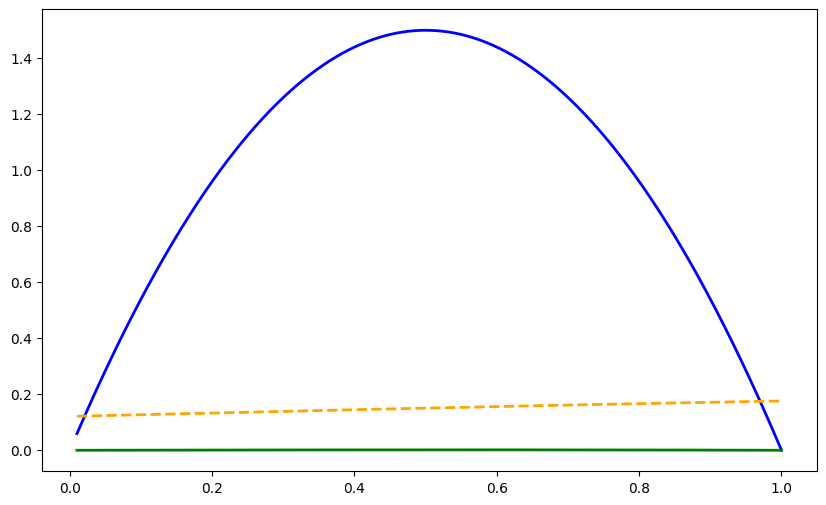

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (beta, binom, norm, uniform, poisson, gamma, 
                         expon, lognorm, chi2, t)
import ipywidgets as widgets
from ipywidgets import interact

# Función astrofísica: Relación entre luminosidad, distancia y flujo
def astrophysical_flux(luminosity, distance):
    """Función astrofísica: Relación entre flujo, luminosidad y distancia"""
    return luminosity / (distance**2)

# Función para graficar las distribuciones
def plot_distributions(prior_dist, prior_param1, prior_param2, 
                       likelihood_dist, likelihood_param1, likelihood_param2,
                       luminosity, distance):
    # Definir el espacio para theta (valores de 0 a 1)
    theta = np.linspace(0.01, 1, 1000)  # Para evitar theta=0
    
    # Distribuciones disponibles
    dist_dict = {
        'Beta': lambda p1, p2: beta.pdf(theta, p1, p2),
        'Normal': lambda p1, p2: norm.pdf(theta, p1, p2),
        'Uniform': lambda p1, p2: uniform.pdf(theta, p1, p2),
        'Poisson': lambda p1, p2: poisson.pmf(np.round(theta * 10), p1),
        'Gamma': lambda p1, p2: gamma.pdf(theta, p1, scale=p2),
        'Exponential': lambda p1, p2: expon.pdf(theta, scale=p2),
        'LogNormal': lambda p1, p2: lognorm.pdf(theta, p1, scale=p2),
        'Chi-squared': lambda p1, p2: chi2.pdf(theta, p1),
        'T-distribution': lambda p1, p2: t.pdf(theta, p1),
        'Binomial': lambda p1, p2: binom.pmf(7, 10, theta),
    }
    
    # Prior
    prior = dist_dict[prior_dist](prior_param1, prior_param2)
    
    # Verosimilitud
    if likelihood_dist == 'Binomial':
        likelihood = binom.pmf(7, 10, theta)
    elif likelihood_dist == 'Poisson':
        likelihood = poisson.pmf(np.round(theta * 10), likelihood_param1)
    else:
        likelihood = dist_dict[likelihood_dist](likelihood_param1, likelihood_param2)
    
    # Posterior (simple multiplicación de prior y likelihood)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalización
    
    # Calcular la función astrofísica: flujo = luminosidad / distancia^2
    flux = astrophysical_flux(luminosity, distance)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(theta, prior, label=f'Prior: {prior_dist}', color='blue', linewidth=2)
    plt.plot(theta, likelihood, label=f'Likelihood: {likelihood_dist}', color='orange', linestyle='--', linewidth=2)
    plt.plot(theta, posterior, label='Posterior', color='green', linewidth=2)
    plt.plot(theta, flux, label='Astrophysical Flux', color='purple', linestyle='-.', linewidth=2)
    
    # Mostrar los parámetros de la posterior y la función astrofísica en el gráfico
    plt.text(0.6, 0.8, f'Media posterior: {np.mean(posterior):.3f}', fontsize=12, color='black')
    plt.text(0.6, 0.75, f'Desviación estándar posterior: {np.std(posterior):.3f}', fontsize=12, color='black')
    plt.text(0.6, 0.7, f'Luminosidad: {luminosity:.3f}', fontsize=12, color='purple')
    plt.text(0.6, 0.65, f'Distancia: {distance:.3f}', fontsize=12, color='purple')
    
    plt.title("Distribuciones: Prior, Likelihood, Posterior y Función Astrofísica (Flux)")
    plt.xlabel(r'$\theta$')
    plt.ylabel("Densidad/Flujo")
    
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Widgets interactivos para luminosidad y distancia
luminosity_widget = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Luminosidad:')
distance_widget = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Distancia:')

# Función interactiva para visualizar las distribuciones
interact(plot_distributions, 
         prior_dist=widgets.Dropdown(options=['Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution', 'Binomial'], value='Beta'),
         prior_param1=widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='Prior Param 1:'),
         prior_param2=widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='Prior Param 2:'),
         likelihood_dist=widgets.Dropdown(options=['Beta', 'Normal', 'Uniform', 'Poisson', 'Gamma', 'Exponential', 'LogNormal', 'Chi-squared', 'T-distribution', 'Binomial'], value='Normal'),
         likelihood_param1=widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='Likelihood Param 1:'),
         likelihood_param2=widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1, description='Likelihood Param 2:'),
         luminosity=luminosity_widget,
         distance=distance_widget)
